In [ ]:
!pip install wget

In [ ]:
#下載字型
import wget
wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")

### 如何使用 scikit-learn 的 RandomForestClassifier 模型來進行分類。
- 我們將使用一個簡單的數據集，其中包含多個特徵，並預測一個二元分類的結果（0 或 1）。

模型準確度：0.90


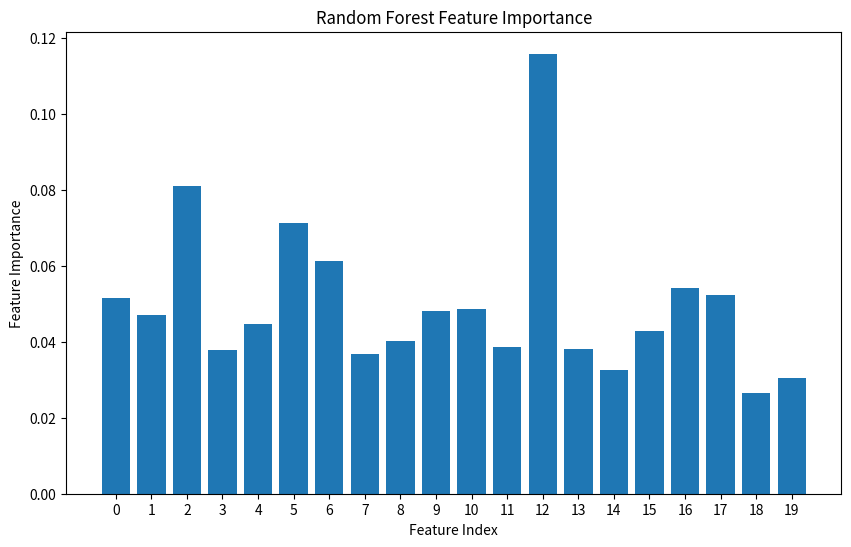

特徵重要性：[0.0515957  0.04703996 0.0810898  0.03771325 0.04456483 0.07115298
 0.06125705 0.03685367 0.04028656 0.04820541 0.04873076 0.03853792
 0.11584115 0.03811819 0.0325459  0.04295724 0.05415805 0.0522912
 0.02656852 0.03049186]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib as mlp
from matplotlib.font_manager import fontManager

fontManager.addfont('ChineseFont.ttf')
mlp.rc('font', family='ChineseFont')

# 1. 產生模擬數據集
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# 2. 分割訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 建立隨機森林模型
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 4. 訓練模型
model.fit(X_train, y_train)

# 5. 進行預測
y_pred = model.predict(X_test)

# 6. 評估模型
accuracy = accuracy_score(y_test, y_pred)
print(f"模型準確度：{accuracy:.2f}")

# 7. 取得特徵重要性並繪製圖表
feature_importances = model.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances)
plt.xticks(range(X.shape[1]))
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

# 8. 取得特徵重要性
print(f"特徵重要性：{model.feature_importances_}")

#### 解釋特徵重要性圖表：

1. 長條越高，表示該特徵對於模型預測結果的影響越大。
2. 學生可以透過這個圖表了解哪些特徵是模型判斷的重要依據。
3. 這有助於進行特徵選擇，移除不重要的特徵，簡化模型。

### 單一決策樹視覺化：
- 隨機森林是由多棵決策樹組成的，我們可以單獨視覺化其中一棵樹，了解其決策過程。
- 雖然無法呈現整個森林的複雜性，但可以理解決策樹的運作方式。
- 使用sklearn.tree裡面的plot_tree功能，可以將單一決策樹視覺化。

模型準確度：0.90


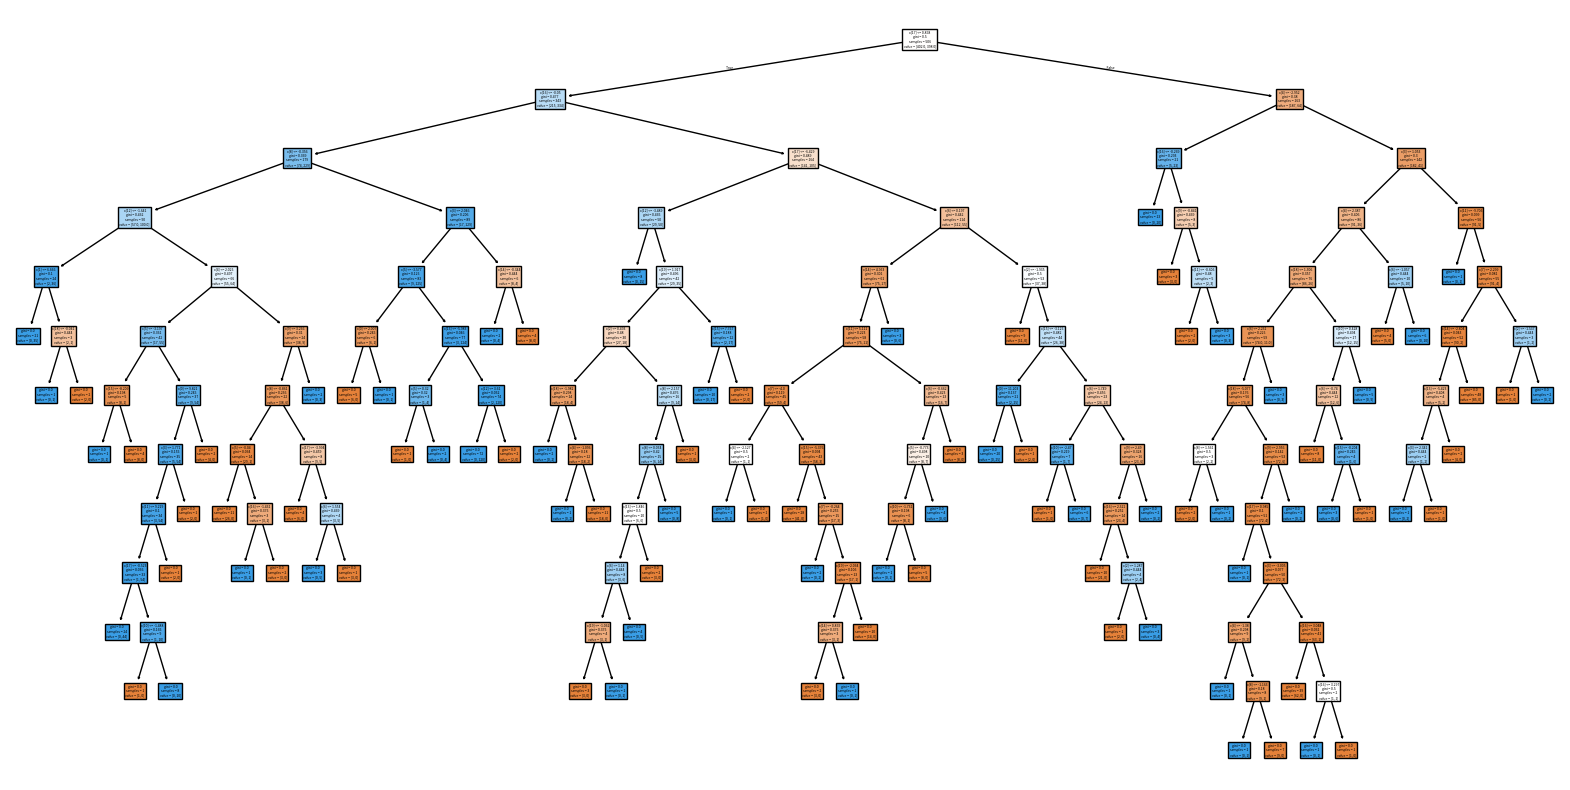

特徵重要性：[0.0515957  0.04703996 0.0810898  0.03771325 0.04456483 0.07115298
 0.06125705 0.03685367 0.04028656 0.04820541 0.04873076 0.03853792
 0.11584115 0.03811819 0.0325459  0.04295724 0.05415805 0.0522912
 0.02656852 0.03049186]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

# 1. 產生模擬數據集
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# 2. 分割訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 建立隨機森林模型
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 4. 訓練模型
model.fit(X_train, y_train)

# 5. 進行預測
y_pred = model.predict(X_test)

# 6. 評估模型
accuracy = accuracy_score(y_test, y_pred)
print(f"模型準確度：{accuracy:.2f}")

# 7. 可視化隨機森林中的第一棵樹
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0], filled=True)  # 可視化第一棵樹
plt.show()

# 8. 取得特徵重要性
print(f"特徵重要性：{model.feature_importances_}")

- 可以清楚看到決策樹的節點、分支和葉子。
- 每個節點代表一個特徵的判斷，分支代表不同的判斷結果。
- 葉子代表最終的分類結果。
- 注意因為隨機森林內的樹木通常很深，所以視覺化出來的圖會很大，資訊量也很多，需要有耐心去解讀。